<a href="https://colab.research.google.com/github/David-Jr/500-AI-Machine-learning-Deep-learning-Computer-vision-NLP-Projects-with-code/blob/main/electricity_theft_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RB
#from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE as SM
from sklearn.ensemble import RandomForestRegressor as RF,GradientBoostingRegressor as GB,ExtraTreesClassifier as ET
from sklearn.metrics import f1_score
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neural_network import MLPClassifier as MP

## Reading The Dataset

In [2]:
df=pd.read_csv('/content/drive/MyDrive/ELECTRICITY_THEFT/data.csv')
df.head()

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,3.42,3.81,4.58,3.56,4.25,3.86,3.53,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31


## Data Cleaning

In [3]:
# Rename column names to ensure that they are in the correct date format
l=df.columns
la=['CONS_NO','FLAG']
lb=[]
for i in l:
    if i not in la:
        lb.append(i)

dates = [datetime.datetime.strptime(ts, "%Y/%m/%d") for ts in lb]
fdates = [datetime.datetime.strftime(ts, "%Y/%m/%d") for ts in dates]

fdates.insert(0,"FLAG")
fdates.insert(0,"CONS_NO")

df.columns=fdates

df.head()

,CONS_NO,FLAG,2014/01/01,2014/01/10,2014/01/11,2014/01/12,2014/01/13,2014/01/14,2014/01/15,2014/01/16,...,2016/09/28,2016/09/29,2016/09/03,2016/09/30,2016/09/04,2016/09/05,2016/09/06,2016/09/07,2016/09/08,2016/09/09
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,3.42,3.81,4.58,3.56,4.25,3.86,3.53,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31


In [4]:
# Sort columns chronologicaly
dates = [datetime.datetime.strptime(ts, "%Y/%m/%d") for ts in lb]

dates.sort()

sorteddates = [datetime.datetime.strftime(ts, "%Y/%m/%d") for ts in dates]
cols=df.columns.tolist()[0:2]+sorteddates
df=df[cols]


df.head()

,CONS_NO,FLAG,2014/01/01,2014/01/02,2014/01/03,2014/01/04,2014/01/05,2014/01/06,2014/01/07,2014/01/08,...,2016/10/22,2016/10/23,2016/10/24,2016/10/25,2016/10/26,2016/10/27,2016/10/28,2016/10/29,2016/10/30,2016/10/31
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,5.64,6.99,3.32,3.61,5.35,4.73,3.68,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72


In [5]:
# Handling missing values:
# Fills missing cells with the averge of the values around this cell

df1=df
# l=df["2014/01/01"]
# l1=df["2014/01/02"]
# l=np.asarray(l).tolist()
# l1=np.asarray(l1).tolist()
# l2=[]
# for i in range(len(l)):
#     if math.isnan(l[i]):
#         if math.isnan(l1[i]):
#             l2.append(0)
#         else:
#             l2.append(l1[i]/2)
#     else:
#         l2.append(l[i])
# df1["2014/01/01"]=l2

# df1.head()
# ========================

# l=df["2016/10/31"]
# l1=df["2016/10/30"]
# l=np.asarray(l).tolist()
# l1=np.asarray(l1).tolist()
# l2=[]
# for i in range(len(l)):
#     if math.isnan(l[i]):
#         if math.isnan(l1[i]):
#             l2.append(0)
#         else:
#             l2.append(l1[i]/2)
#     else:
#         l2.append(l[i])
# df1["2016/10/31"]=l2
# df1.head()

df1.iloc[1:, 1:] = df1.iloc[1:, 1:].fillna(
    df1.iloc[1:, 1:].rolling(
        window=3,
        center=True,
        min_periods=2,
        axis=1
        ).mean()
    )
df1.head()

<ipython-input-5-4110396b178e>:40: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  df1.iloc[1:, 1:].rolling(


,CONS_NO,FLAG,2014/01/01,2014/01/02,2014/01/03,2014/01/04,2014/01/05,2014/01/06,2014/01/07,2014/01/08,...,2016/10/22,2016/10/23,2016/10/24,2016/10/25,2016/10/26,2016/10/27,2016/10/28,2016/10/29,2016/10/30,2016/10/31
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,5.64,6.99,3.32,3.61,5.35,4.73,3.68,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72


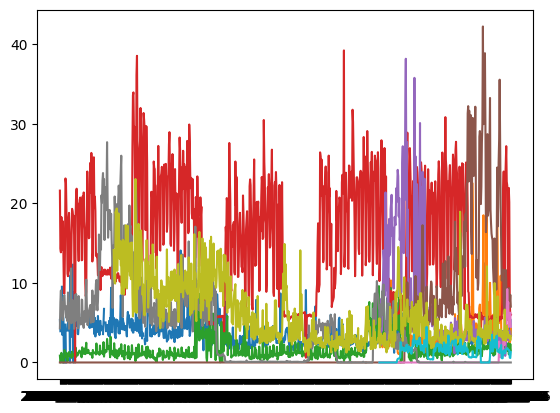

In [8]:
# Plotting
lbx = [i for i in df.columns if i not in ['CONS_NO', 'FLAG']]
df1.iloc[3800]["FLAG"]

l1=lbx[100:990]

for i in range(5700,5710):
    plt.plot(l1,df1.iloc[i][l1])
plt.show()